In [1]:
import pandas as pd
import numpy as np
from IPython.display import display

#Plots:
import plotly.graph_objects as go
import plotly.express as px

In [2]:
filepath = "Enron_Kaggle_dataset/Enron_2001.csv"
# Read the data into a pandas dataframe called emails
df = pd.read_csv(filepath)

In [3]:
df.head()

,X-From,employee,Date,Subject,X-Folder,X-To,X-cc,X-Origin,year,email-body
0,Phillip K Allen,allen-p,2001-05-14 23:39:00+00:00,NaN,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Tim Belden <Tim Belden/Enron@EnronXGate>,NaN,Allen-P,2001,Here is our forecast
1,Phillip K Allen,allen-p,2001-05-04 20:51:00+00:00,Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",John J Lavorato <John J Lavorato/ENRON@enronXg...,NaN,Allen-P,2001,Traveling to have a business meeting takes th...
2,Phillip K Allen,allen-p,2001-05-04 18:26:00+00:00,NaN,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Tim Heizenrader <Tim Heizenrader/Enron@EnronXG...,NaN,Allen-P,2001,"Tim, mike grigsby is having problems with ac..."
3,Phillip K Allen,allen-p,2001-05-03 22:57:00+00:00,NaN,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",rlehmann <rlehmann@yahoo.com>,NaN,Allen-P,2001,"Reagan, Just wanted to give you an update. ..."
4,Phillip K Allen,allen-p,2001-05-02 19:36:00+00:00,NaN,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",James D Steffes <James D Steffes/NA/Enron@Enron>,NaN,Allen-P,2001,"Jim, Is there going to be a conference call ..."


In [4]:
df.columns.to_list()

['X-From',
 'employee',
 'Date',
 'Subject',
 'X-Folder',
 'X-To',
 'X-cc',
 'X-Origin',
 'year',
 'email-body']

In [5]:
# df = df.drop(['Date','Subject','X-Folder','X-cc','X-Origin','email-body'], axis=1)
df = df.drop(['Date','Subject','X-Folder','X-cc','email-body'], axis=1)

df.head()

,X-From,employee,X-To,X-Origin,year
0,Phillip K Allen,allen-p,Tim Belden <Tim Belden/Enron@EnronXGate>,Allen-P,2001
1,Phillip K Allen,allen-p,John J Lavorato <John J Lavorato/ENRON@enronXg...,Allen-P,2001
2,Phillip K Allen,allen-p,Tim Heizenrader <Tim Heizenrader/Enron@EnronXG...,Allen-P,2001
3,Phillip K Allen,allen-p,rlehmann <rlehmann@yahoo.com>,Allen-P,2001
4,Phillip K Allen,allen-p,James D Steffes <James D Steffes/NA/Enron@Enron>,Allen-P,2001


In [6]:
# df_group = df.groupby(['X-From','X-To'], as_index=False).count()
df_group = df.groupby(['employee','X-From','X-To','X-Origin'], as_index=False).count()
df_group.rename(columns={'year':'freq'}, inplace=True)


In [7]:
df_group.sort_values(by='freq', ascending= False).head(5)

,employee,X-From,X-To,X-Origin,freq
43405,linder-e,Schedule Crawler<pete.davis@enron.com>,pete.davis@enron.com,LINDER-E,2154
24057,guzman-m,Schedule Crawler<pete.davis@enron.com>,pete.davis@enron.com,GUZMAN-M,2145
50459,merriss-s,Schedule Crawler<pete.davis@enron.com>,pete.davis@enron.com,MERRISS-S,1035
16801,dean-c,"Davis, Pete </O=ENRON/OU=NA/CN=RECIPIENTS/CN=P...","Davis, Pete </O=ENRON/OU=NA/CN=RECIPIENTS/CN=P...",DEAN-C,601
82831,williams-w3,"Davis, Pete </O=ENRON/OU=NA/CN=RECIPIENTS/CN=P...","Davis, Pete </O=ENRON/OU=NA/CN=RECIPIENTS/CN=P...",WILLIAMS-W3,486


In [8]:
# Shape of df
df_group.shape

(85241, 5)

In [9]:
### Selection of small subset for development:
df_group = df_group.loc[np.random.choice(df_group.index, 1000, replace=False)] # 1000 emails

In [10]:
# How many people are we studying?
df_group['employee'].nunique()

133

In [11]:
import networkx as nx

In [12]:
## Creating a Graph

g=nx.Graph()


### Building nodes:
for idx, feature in df_group.iterrows():
    g.add_edge(feature[1],feature[2],weight=feature[4])

In [13]:
### Checking nodes:

#Returns list of nodes

# g.nodes()

In [14]:
# Returns nodes along with their atributes (as a dictionary):

g.nodes(data=True)

NodeDataView({'Lipshutz, Cheryl': {}, 'Skilling, Jeff </o=ENRON/ou=NA/cn=Recipients/cn=JSKILLIN>': {}, 'Porter, David V. </O=ENRON/OU=NA/CN=RECIPIENTS/CN=DPORTER3>': {}, 'DL-Portland Real Time Shift </O=ENRON/OU=NA/CN=RECIPIENTS/CN=DL-PortlandRealTimeShift>': {}, 'llmaser@degeurinrealty.com': {}, 'clint.dean@enron.com': {}, '"David L. Vogel" <dvogel@powellbrewer.com>@ENRON': {}, 'Scott Sanders \\(E-mail\\) <SSanders@mtsqh.com>': {}, '"Ledene, Ben" <BenLedene@aec.ca>@ENRON <IMCEANOTES-+22Ledene+2C+20Ben+22+20+3CBenLedene+40aec+2Eca+3E+40ENRON@ENRON.com>': {}, "Alan Vallow <avallow@lodielectric.com>, Angela Jones (E-mail) <Angela@cook-inlet.com>, Barry Brunelle (E-mail) <Bbrunel@SMUD.org>, Bill Collier <colliw@texaco.com>, Bill Fagan (E-mail) <five5wood@aol.com>, Bill Wood <bwood@energy.state.ca.us>, Brad Barnds (E-mail) <bradb@calpine.com>, Brent Balog <BrentBalog@aec.ca>, Brent Rook (E-mail) <brook@coral-energy.com>, Candy Decoteau (E-mail) <cdecotea@westerngas.com>, Carole Poulter <ca

In [15]:
# Returns edges along with their atributes (as a dictionary):
edge_list = g.edges()
edge_dict= g.edges(data=True)

In [ ]:
#first, let's make sure that all nodes in the graph have the 'freq' attribute
for n in g.nodes_iter(): g.node[n]['freq']='None'

attrb=csv.reader(open('9_11_attrib.txt','rb'))
for line in attrb:
    g.node[line[0]]['flight']=line[1]

In [16]:
# Define find_nodes_with_highest_deg_cent()

def find_nodes_with_highest_deg_cent(G):

    # Compute the degree centrality of G: deg_cent
    deg_cent = nx.degree_centrality(G)
    
    # Compute the maximum degree centrality: max_dc
    max_1_dc = max(list(deg_cent.values()))
    max_2_dc = list(sorted(deg_cent.values()))[-2]
    max_3_dc = list(sorted(deg_cent.values()))[-3]

    maxnode1 = set()
    maxnode2 = set()
    maxnode3 = set()

    # Iterate over the degree centrality dictionary
    for k, v in deg_cent.items():

        # Check if the current value has the maximum degree centrality
        if v == max_1_dc:

            # Add the current node to the set of nodes
            maxnode1.add(k)
        if v == max_2_dc:

            # Add the current node to the set of nodes
            maxnode2.add(k)
        if v == max_3_dc:

            # Add the current node to the set of nodes
            maxnode3.add(k)

    return maxnode1,maxnode2,maxnode3

top_deg_dc,top2_deg_dc,top3_deg_dc = find_nodes_with_highest_deg_cent(g)
print(top_deg_dc,top2_deg_dc,top3_deg_dc)

{'Jeff Dasovich'} {'Dasovich, Jeff </O=ENRON/OU=NA/CN=RECIPIENTS/CN=JDASOVIC>', 'Vince J Kaminski'} {'Dasovich, Jeff </O=ENRON/OU=NA/CN=RECIPIENTS/CN=JDASOVIC>', 'Vince J Kaminski'}


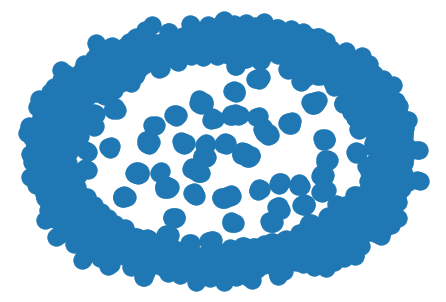

In [20]:
H = nx.Graph(edge_list)
nx.draw(H)

AttributeError: 'dict' object has no attribute 'edges'

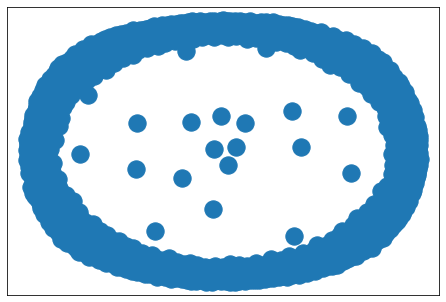